# Phân loại rating phim dựa trên thông tin bộ phim 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.core.display import display, HTML
import requests
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

import ast
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score




In [2]:
def FillNun(movies_clean):
    movies_clean = movies_clean.drop(movies_clean.columns[0],axis=1)

    movies_clean['Creator'].fillna('Unknown', inplace=True)
    movies_clean['Director'].fillna('Unknown', inplace=True)
    movies_clean['Actor 1'].fillna('Unknown', inplace=True)
    movies_clean['Actor 2'].fillna('Unknown', inplace=True)
    movies_clean['Genre'].fillna('Unknown', inplace=True)

    return movies_clean

movies_clean = pd.DataFrame(pd.read_csv('clean_data_train.csv'))
movies_clean = FillNun(movies_clean)

print("Train data")
movies_clean.head(10)

Train data


,Name,Rating,Director,Creator,Genre,DatePublished,Actor 1,Actor 2,Description
0,Bullet Train,7.3,David Leitch,Zak Olkewicz,"['Action', 'Comedy', 'Thriller']",2022-08-05,Brad Pitt,Joey King,five assassin aboard swiftly-mov bullet train ...
1,The Truth Will Set You Free,8.0,Erin Ehrlich,Sarah Watson,"['Comedy', 'Drama']",2020-07-02,Katie Stevens,Aisha Dee,jane n't comfort post-surgeri bodi visit dad m...
2,Rasga Mortalha,7.7,Thiago Martins De Melo,Thiago Martins De Melo,"['Animation', 'Short']",2020-09-25,Unknown,Unknown,rasga mortalha come legend owl `` suindara '' ...
3,Ufos And Paranormal Phenomena,7.3,Unknown,Unknown,['Documentary'],1995-01-10,Christopher Chacon,Lars Svedberg,documentari seri incred claim central thread u...
4,Findiktan Sonra,6.4,Ercan Kesal,Unknown,"['Documentary', 'Short']",NaN,Yasar Mutioglu,Fikret Yapici,none
5,Mothers,8.6,Horia Cucuta,Luke Anthony Walker,"['Short', 'Horror']",2020-08-01,Mihaela Trofimov,Mara Ecaterina Gänæaard,put lover 's child bed night day move women 's...
6,Les Méchants,4.0,Mouloud Achour,Mouloud Achour,['Comedy'],2021-09-08,Roman Frayssinet,Djimo,steal video-gam consol migrant sébastien tri s...
7,I Am Afraid To Forget Your Face,6.9,Sameh Alaa,Sameh Alaa,"['Short', 'Drama']",2020-09-10,Nourhan Ahmed,Yousef Elrashidy,82-day separ adam travel rough road reunit one...
8,May The Ar Be Li$$ You: Season Vii - The Arli$...,8.0,Patrick Cotnoir,Connor Ratliff,"['Comedy', 'Talk-Show']",2020-06-28,Michael Boatman,Hallie Bulleit,season vii arli awaken us dream becom champion...
9,Blackpink: How You Like That,7.7,Unknown,Unknown,['Music'],2020-06-26,Unknown,Unknown,`` like '' blackpink power anthem self-confid ...


In [3]:
movies_clean_test = pd.DataFrame(pd.read_csv('clean_data_test.csv'))
movies_clean_test = FillNun(movies_clean_test)

print("Test data")
movies_clean_test.head(10)

Test data


,Name,Rating,Director,Creator,Genre,DatePublished,Actor 1,Actor 2,Description
0,Fire And Ice,9.0,Unknown,Unknown,"['Reality-Tv', 'Western']",2020-06-11,Raleigh Avery,Eustace Conway,tom sean battl bitter cold search better trap ...
1,La Casa Del Caracol,5.1,Macarena Astorga,Sandra García Nieto,"['Horror', 'Thriller']",2021-06-11,Javier Rey,Paz Vega,follow writer antonio seclud mountain fall lus...
2,Love Or Con?,7.6,Unknown,Unknown,"['Reality-Tv', 'Romance']",2019-11-01,Unknown,Unknown,lacey await fiancé john 's releas amber reveal...
3,Stickman,6.2,Unknown,Unknown,['Animation'],2020-06-12,Blake Douglas,Albie Robles,ryan stickman cop mani year get bore job one d...
4,6Ix9Ine & Nicki Minaj: Trollz,4.5,Unknown,Unknown,['Music'],2020-06-12,Unknown,Unknown,rapper tekashi 6ix9in superstar rapper nicki m...
5,Ghost Adventures: Quarantine,7.1,Unknown,Unknown,"['Documentary', 'History', 'Reality-Tv']",2020-06-11,Zak Bagans,Aaron Goodwin,zak bagan aaron goodwin jay wasley billi tolle...
6,Camilo & Pablo Alborán: El Mismo Aire,4.8,Unknown,Unknown,['Music'],2020-06-10,Unknown,Unknown,none
7,Pitbull Feat. Tito El Bambino & Guru Randhawa:...,5.2,Unknown,Unknown,['Music'],2020-06-08,Unknown,Unknown,none
8,Lies,6.8,Leszek Dawid,Harlan Coben,"['Crime', 'Drama', 'Mystery']",2020-06-12,Grzegorz Damiecki,Agnieszka Grochowska,student 's essay spook laura terrifi memori wo...
9,J. Balvin: Azul (Animated Version),6.0,Unknown,Unknown,"['Animation', 'Music']",2020-06-11,Unknown,Unknown,none


# Feature Engineering

# Feature: Genre

In [4]:
import ast
def Genre(movies_clean):
    movies_clean['Genre'] = movies_clean['Genre'].apply(ast.literal_eval)
    df_genres_added = pd.Series(movies_clean['Genre'])
    df_genres_added = pd.get_dummies(df_genres_added.apply(pd.Series).stack()).groupby(level=0, sort=False).sum()


    # Turns genres into dummy variables
    df_genres_mpaa = pd.concat([movies_clean, df_genres_added], axis=1)
    df_genres_mpaa = df_genres_mpaa.drop('Genre',axis=1)

    return df_genres_mpaa

df_genres_mpaa = Genre(movies_clean)

print("Train data")
df_genres_mpaa

Train data


,Name,Rating,Director,Creator,DatePublished,Actor 1,Actor 2,Description,Action,Adult,...,None,Reality-Tv,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,Bullet Train,7.3,David Leitch,Zak Olkewicz,2022-08-05,Brad Pitt,Joey King,five assassin aboard swiftly-mov bullet train ...,1,0,...,0,0,0,0,0,0,0,1,0,0
1,The Truth Will Set You Free,8.0,Erin Ehrlich,Sarah Watson,2020-07-02,Katie Stevens,Aisha Dee,jane n't comfort post-surgeri bodi visit dad m...,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Rasga Mortalha,7.7,Thiago Martins De Melo,Thiago Martins De Melo,2020-09-25,Unknown,Unknown,rasga mortalha come legend owl `` suindara '' ...,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Ufos And Paranormal Phenomena,7.3,Unknown,Unknown,1995-01-10,Christopher Chacon,Lars Svedberg,documentari seri incred claim central thread u...,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Findiktan Sonra,6.4,Ercan Kesal,Unknown,NaN,Yasar Mutioglu,Fikret Yapici,none,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,Toxique,6.7,Alexandre Laurent,Fanny Robert,2020-08-27,Shy'M,Philippe Bas,'s almost christma elisa famili bought christm...,0,0,...,0,0,0,0,0,0,0,1,0,0
1893,Requiem,7.2,Alexandre Laurent,Fanny Robert,2020-08-27,Philippe Bas,Shy'M,elisa daughter woken christma morn polic raid ...,0,0,...,0,0,0,0,0,0,0,1,0,0
1894,Apstjärnan,5.7,Linda Hambäck,Jan Vierth,2021-08-24,Rebecca Gerstmann,Pernilla August,jonna live orphanag life one day gorilla come ...,0,0,...,0,0,0,0,0,0,0,0,0,0
1895,Garage Sale Mysteries,7.3,Unknown,Unknown,2013-09-14,Lori Loughlin,Sarah Strange,jennif shannon co-own antiqu store best friend...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_genres_mpaa_test = Genre(movies_clean_test)

print("Test data")
df_genres_mpaa_test.head(10)

Test data


,Name,Rating,Director,Creator,DatePublished,Actor 1,Actor 2,Description,Action,Adventure,...,News,Reality-Tv,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,Fire And Ice,9.0,Unknown,Unknown,2020-06-11,Raleigh Avery,Eustace Conway,tom sean battl bitter cold search better trap ...,0,0,...,0,1,0,0,0,0,0,0,0,1
1,La Casa Del Caracol,5.1,Macarena Astorga,Sandra García Nieto,2021-06-11,Javier Rey,Paz Vega,follow writer antonio seclud mountain fall lus...,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Love Or Con?,7.6,Unknown,Unknown,2019-11-01,Unknown,Unknown,lacey await fiancé john 's releas amber reveal...,0,0,...,0,1,1,0,0,0,0,0,0,0
3,Stickman,6.2,Unknown,Unknown,2020-06-12,Blake Douglas,Albie Robles,ryan stickman cop mani year get bore job one d...,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6Ix9Ine & Nicki Minaj: Trollz,4.5,Unknown,Unknown,2020-06-12,Unknown,Unknown,rapper tekashi 6ix9in superstar rapper nicki m...,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Ghost Adventures: Quarantine,7.1,Unknown,Unknown,2020-06-11,Zak Bagans,Aaron Goodwin,zak bagan aaron goodwin jay wasley billi tolle...,0,0,...,0,1,0,0,0,0,0,0,0,0
6,Camilo & Pablo Alborán: El Mismo Aire,4.8,Unknown,Unknown,2020-06-10,Unknown,Unknown,none,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Pitbull Feat. Tito El Bambino & Guru Randhawa:...,5.2,Unknown,Unknown,2020-06-08,Unknown,Unknown,none,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Lies,6.8,Leszek Dawid,Harlan Coben,2020-06-12,Grzegorz Damiecki,Agnieszka Grochowska,student 's essay spook laura terrifi memori wo...,0,0,...,0,0,0,0,0,0,0,0,0,0
9,J. Balvin: Azul (Animated Version),6.0,Unknown,Unknown,2020-06-11,Unknown,Unknown,none,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature: DatePublished

In [6]:
def DatePublished_endcoded(df_genres_mpaa):
    date = pd.to_datetime(datetime.now().date())
    df_genres_mpaa['years since Published'] = df_genres_mpaa['DatePublished'].apply(lambda x: (((date-pd.to_datetime(x))).days/ 365.25))
    df_genres_mpaa = df_genres_mpaa.drop(['DatePublished'],axis=1)

    # Thay cac gia tri NaN bang gia tri trung binh
    mean_date_published = df_genres_mpaa['years since Published'].mean()
    df_genres_mpaa['years since Published'].fillna(mean_date_published, inplace=True)
    return df_genres_mpaa

def DatePublished_MinMaxscaler(df_genres_mpaa) :
    scaler2 = MinMaxScaler()
    df_genres_mpaa['years since Published'] = scaler2.fit_transform(df_genres_mpaa[['years since Published']])
    return df_genres_mpaa

df_genres_mpaa = DatePublished_endcoded(df_genres_mpaa)
df_genres_mpaa = DatePublished_MinMaxscaler(df_genres_mpaa)

df_genres_mpaa_test = DatePublished_endcoded(df_genres_mpaa_test)
df_genres_mpaa_test = DatePublished_MinMaxscaler(df_genres_mpaa_test)


# Feature: Director, Creator, Actor 1, Actor 2

In [7]:
def target_encoding(df, cat_column, target_column, new_column_name='Director_encoded'):
    # Calculate mean rating for each director
    mean_rating = df.groupby(cat_column)[target_column].mean()

    # Map mean rating values to each director in the original DataFrame
    df[new_column_name] = df[cat_column].map(mean_rating)
    return df


df_genres_mpaa = target_encoding(df_genres_mpaa, 'Director','Rating','Director_encoded')
df_genres_mpaa = target_encoding(df_genres_mpaa, 'Creator', 'Rating','Creator_encoded')
df_genres_mpaa = target_encoding(df_genres_mpaa, 'Actor 1', 'Rating','Actor1_encoded')
df_genres_mpaa = target_encoding(df_genres_mpaa, 'Actor 2', 'Rating','Actor2_encoded')

scaler = MinMaxScaler()
df_genres_mpaa['Director_encoded'] = scaler.fit_transform(df_genres_mpaa[['Director_encoded']])
df_genres_mpaa['Creator_encoded'] = scaler.fit_transform(df_genres_mpaa[['Creator_encoded']])
df_genres_mpaa['Actor1_encoded'] = scaler.fit_transform(df_genres_mpaa[['Actor1_encoded']])
df_genres_mpaa['Actor2_encoded'] = scaler.fit_transform(df_genres_mpaa[['Actor2_encoded']])

df_genres_mpaa

,Name,Rating,Director,Creator,Actor 1,Actor 2,Description,Action,Adult,Adventure,...,Sport,Talk-Show,Thriller,War,Western,years since Published,Director_encoded,Creator_encoded,Actor1_encoded,Actor2_encoded
0,Bullet Train,7.3,David Leitch,Zak Olkewicz,Brad Pitt,Joey King,five assassin aboard swiftly-mov bullet train ...,1,0,0,...,0,0,1,0,0,0.023339,0.700000,0.640000,0.700000,0.700000
1,The Truth Will Set You Free,8.0,Erin Ehrlich,Sarah Watson,Katie Stevens,Aisha Dee,jane n't comfort post-surgeri bodi visit dad m...,0,0,0,...,0,0,0,0,0,0.053357,0.777778,0.700000,0.750000,0.750000
2,Rasga Mortalha,7.7,Thiago Martins De Melo,Thiago Martins De Melo,Unknown,Unknown,rasga mortalha come legend owl `` suindara '' ...,0,0,0,...,0,0,0,0,0,0.050018,0.744444,0.693333,0.678679,0.678679
3,Ufos And Paranormal Phenomena,7.3,Unknown,Unknown,Christopher Chacon,Lars Svedberg,documentari seri incred claim central thread u...,0,0,0,...,0,0,0,0,0,0.418962,0.695305,0.643068,0.700000,0.700000
4,Findiktan Sonra,6.4,Ercan Kesal,Unknown,Yasar Mutioglu,Fikret Yapici,none,0,0,0,...,0,0,0,0,0,0.072149,0.600000,0.643068,0.600000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,Toxique,6.7,Alexandre Laurent,Fanny Robert,Shy'M,Philippe Bas,'s almost christma elisa famili bought christm...,0,0,0,...,0,0,1,0,0,0.051157,0.661111,0.593333,0.633333,0.633333
1893,Requiem,7.2,Alexandre Laurent,Fanny Robert,Philippe Bas,Shy'M,elisa daughter woken christma morn polic raid ...,0,0,0,...,0,0,1,0,0,0.051157,0.661111,0.593333,0.688889,0.688889
1894,Apstjärnan,5.7,Linda Hambäck,Jan Vierth,Rebecca Gerstmann,Pernilla August,jonna live orphanag life one day gorilla come ...,0,0,0,...,0,0,0,0,0,0.036934,0.522222,0.426667,0.522222,0.522222
1895,Garage Sale Mysteries,7.3,Unknown,Unknown,Lori Loughlin,Sarah Strange,jennif shannon co-own antiqu store best friend...,0,0,0,...,0,0,0,0,0,0.150917,0.695305,0.643068,0.672222,0.700000


In [8]:
df_genres_mpaa_test = target_encoding(df_genres_mpaa_test, 'Director','Rating','Director_encoded')
df_genres_mpaa_test = target_encoding(df_genres_mpaa_test, 'Creator', 'Rating','Creator_encoded')
df_genres_mpaa_test = target_encoding(df_genres_mpaa_test, 'Actor 1', 'Rating','Actor1_encoded')
df_genres_mpaa_test = target_encoding(df_genres_mpaa_test, 'Actor 2', 'Rating','Actor2_encoded')

scaler = MinMaxScaler()
df_genres_mpaa_test['Director_encoded'] = scaler.fit_transform(df_genres_mpaa_test[['Director_encoded']])
df_genres_mpaa_test['Creator_encoded'] = scaler.fit_transform(df_genres_mpaa_test[['Creator_encoded']])
df_genres_mpaa_test['Actor1_encoded'] = scaler.fit_transform(df_genres_mpaa_test[['Actor1_encoded']])
df_genres_mpaa_test['Actor2_encoded'] = scaler.fit_transform(df_genres_mpaa_test[['Actor2_encoded']])

df_genres_mpaa_test

,Name,Rating,Director,Creator,Actor 1,Actor 2,Description,Action,Adventure,Animation,...,Sport,Talk-Show,Thriller,War,Western,years since Published,Director_encoded,Creator_encoded,Actor1_encoded,Actor2_encoded
0,Fire And Ice,9.0,Unknown,Unknown,Raleigh Avery,Eustace Conway,tom sean battl bitter cold search better trap ...,0,0,0,...,0,0,0,0,1,0.056973,0.677187,0.753452,0.900000,0.900000
1,La Casa Del Caracol,5.1,Macarena Astorga,Sandra García Nieto,Javier Rey,Paz Vega,follow writer antonio seclud mountain fall lus...,0,0,0,...,0,0,1,0,0,0.040162,0.412500,0.412500,0.412500,0.412500
2,Love Or Con?,7.6,Unknown,Unknown,Unknown,Unknown,lacey await fiancé john 's releas amber reveal...,0,0,0,...,0,0,0,0,0,0.067244,0.677187,0.753452,0.652586,0.652586
3,Stickman,6.2,Unknown,Unknown,Blake Douglas,Albie Robles,ryan stickman cop mani year get bore job one d...,0,0,1,...,0,0,0,0,0,0.056927,0.677187,0.753452,0.550000,0.550000
4,6Ix9Ine & Nicki Minaj: Trollz,4.5,Unknown,Unknown,Unknown,Unknown,rapper tekashi 6ix9in superstar rapper nicki m...,0,0,0,...,0,0,0,0,0,0.056927,0.677187,0.753452,0.652586,0.652586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Crazy Horse,6.5,Frederick Wiseman,Unknown,Philippe Decouflé,Naamah Alva,look insid pari crazi hors club boast greatest...,0,0,0,...,0,0,0,0,0,0.203067,0.587500,0.753452,0.587500,0.587500
375,Express Scopelitis,6.6,Aimilia Milou,Aimilia Milou,Unknown,Unknown,legendari greek boat introduc us marin life sm...,0,0,0,...,0,0,0,0,0,0.054854,0.600000,0.600000,0.652586,0.652586
376,Texture Pack,8.1,Alan Becker,Alan Becker,Unknown,Unknown,yellow red make life confus switch textur block,1,1,1,...,0,0,0,0,0,0.056881,0.787500,0.787500,0.652586,0.652586
377,Hay Sultan,7.2,Unknown,Unknown,Mehmet Özgür,Kerem Arslanoglu,abdulkadir geylani esref met journey set baghd...,0,0,0,...,0,0,0,0,0,0.008152,0.677187,0.753452,0.675000,0.675000


In [9]:
prod_model = df_genres_mpaa
prod_model = prod_model.drop(['Director' , 'Creator' , 'Description', 'Actor 1' , 'Actor 2' ],axis=1)

criteria = [prod_model['Rating'].between(0, 4), prod_model['Rating'].between(4, 6), prod_model['Rating'].between(6, 8), prod_model['Rating'].between(8, 10)]
values = [1, 2, 3, 4]
prod_model['target'] = np.select(criteria, values, 0)
prod_model.tail()
prod_model = prod_model.drop('Rating',axis=1)

#prod_model.to_csv('CheckData.csv', index=False)
prod_model.head()

,Name,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Talk-Show,Thriller,War,Western,years since Published,Director_encoded,Creator_encoded,Actor1_encoded,Actor2_encoded,target
0,Bullet Train,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0.023339,0.700000,0.640000,0.700000,0.700000,3
1,The Truth Will Set You Free,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0.053357,0.777778,0.700000,0.750000,0.750000,3
2,Rasga Mortalha,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0.050018,0.744444,0.693333,0.678679,0.678679,3
3,Ufos And Paranormal Phenomena,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0.418962,0.695305,0.643068,0.700000,0.700000,3
4,Findiktan Sonra,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0.072149,0.600000,0.643068,0.600000,0.600000,3


In [10]:
prod_model_test = df_genres_mpaa_test
prod_model_test = prod_model_test.drop(['Director' , 'Creator' , 'Description', 'Actor 1' , 'Actor 2' ],axis=1)

criteria = [prod_model_test['Rating'].between(0, 4), prod_model_test['Rating'].between(4, 6), prod_model_test['Rating'].between(6, 8), prod_model_test['Rating'].between(8, 10)]
values = [1, 2, 3, 4]
prod_model_test['target'] = np.select(criteria, values, 0)
prod_model_test.tail()
prod_model_test = prod_model_test.drop('Rating',axis=1)

#prod_model.to_csv('CheckData.csv', index=False)
prod_model_test.head()

,Name,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Talk-Show,Thriller,War,Western,years since Published,Director_encoded,Creator_encoded,Actor1_encoded,Actor2_encoded,target
0,Fire And Ice,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0.056973,0.677187,0.753452,0.900000,0.900000,4
1,La Casa Del Caracol,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0.040162,0.412500,0.412500,0.412500,0.412500,2
2,Love Or Con?,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.067244,0.677187,0.753452,0.652586,0.652586,3
3,Stickman,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0.056927,0.677187,0.753452,0.550000,0.550000,3
4,6Ix9Ine & Nicki Minaj: Trollz,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.056927,0.677187,0.753452,0.652586,0.652586,2


# Feature Selection

Chỉ lấy những đặc trưng có độ tương quan với biến mục tiêu > 0.2

In [11]:
dff = prod_model.copy()
dff = dff.drop(['Name'] , axis=1)
# Tính toán ma trận tương quan
correlation_matrix = dff.corr()


# Định nghĩa ngưỡng
target_correlation_threshold = 0.2  # Ngưỡng cho tương quan với biến mục tiêu

# Tên của biến mục tiêu
target = 'target'  # Thay đổi 'target' thành tên biến mục tiêu của bạn

# Giữ lại các feature có độ tương quan cao với biến mục tiêu
features_to_keep = correlation_matrix[target][np.abs(correlation_matrix[target]) > target_correlation_threshold].index.tolist()
print("Features to keep: " ,features_to_keep)

features_to_delete = correlation_matrix[target][np.abs(correlation_matrix[target]) <= target_correlation_threshold].index.tolist()
print("Features to delete: " , features_to_delete)

prod_model = prod_model[['Name'] + features_to_keep]
prod_model


Features to keep:  ['Family', 'Horror', 'Director_encoded', 'Creator_encoded', 'Actor1_encoded', 'Actor2_encoded', 'target']
Features to delete:  ['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Game-Show', 'History', 'Music', 'Musical', 'Mystery', 'News', 'None', 'Reality-Tv', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western', 'years since Published']


,Name,Family,Horror,Director_encoded,Creator_encoded,Actor1_encoded,Actor2_encoded,target
0,Bullet Train,0,0,0.700000,0.640000,0.700000,0.700000,3
1,The Truth Will Set You Free,0,0,0.777778,0.700000,0.750000,0.750000,3
2,Rasga Mortalha,0,0,0.744444,0.693333,0.678679,0.678679,3
3,Ufos And Paranormal Phenomena,0,0,0.695305,0.643068,0.700000,0.700000,3
4,Findiktan Sonra,0,0,0.600000,0.643068,0.600000,0.600000,3
...,...,...,...,...,...,...,...,...
1892,Toxique,0,0,0.661111,0.593333,0.633333,0.633333,3
1893,Requiem,0,0,0.661111,0.593333,0.688889,0.688889,3
1894,Apstjärnan,1,0,0.522222,0.426667,0.522222,0.522222,2
1895,Garage Sale Mysteries,0,0,0.695305,0.643068,0.672222,0.700000,3


In [12]:
dff = prod_model_test.copy()
dff = dff.drop(['Name'] , axis=1)
# Tính toán ma trận tương quan
correlation_matrix = dff.corr()


# Định nghĩa ngưỡng
target_correlation_threshold = 0.1  # Ngưỡng cho tương quan với biến mục tiêu

prod_model_test = prod_model_test[['Name'] + features_to_keep]
#prod_model_test = prod_model_test[features_to_keep]
prod_model_test

,Name,Family,Horror,Director_encoded,Creator_encoded,Actor1_encoded,Actor2_encoded,target
0,Fire And Ice,0,0,0.677187,0.753452,0.900000,0.900000,4
1,La Casa Del Caracol,0,1,0.412500,0.412500,0.412500,0.412500,2
2,Love Or Con?,0,0,0.677187,0.753452,0.652586,0.652586,3
3,Stickman,0,0,0.677187,0.753452,0.550000,0.550000,3
4,6Ix9Ine & Nicki Minaj: Trollz,0,0,0.677187,0.753452,0.652586,0.652586,2
...,...,...,...,...,...,...,...,...
374,Crazy Horse,0,0,0.587500,0.753452,0.587500,0.587500,3
375,Express Scopelitis,0,0,0.600000,0.600000,0.652586,0.652586,3
376,Texture Pack,0,0,0.787500,0.787500,0.652586,0.652586,4
377,Hay Sultan,0,0,0.677187,0.753452,0.675000,0.675000,3


In [13]:
X, y = prod_model.iloc[:,1:7], prod_model['target']
cols = list(X.columns)

#X_train, y_train= X , y 
X_train2, X_val, y_train2, y_val = train_test_split(X, y, test_size=.2, random_state=20)

X2, y2 = prod_model_test.iloc[:,1:7], prod_model_test['target']
X_test , y_test = X2 , y2 

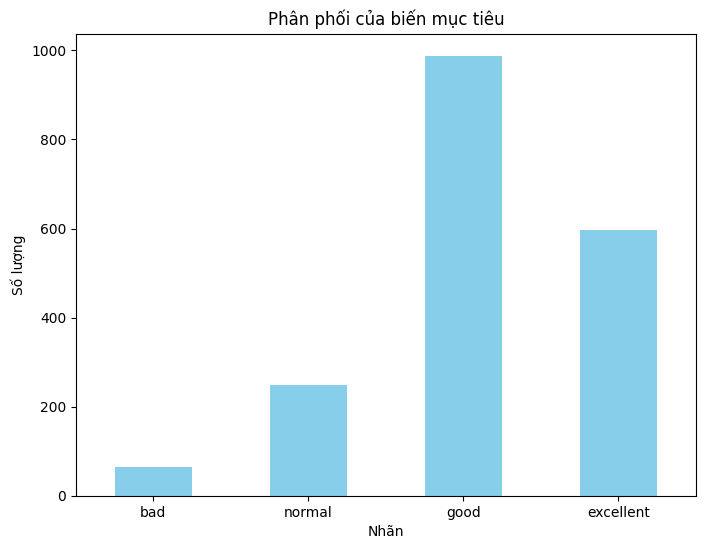

In [14]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ phân phối của biến mục tiêu
plt.figure(figsize=(8, 6))
prod_model['target'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Phân phối của biến mục tiêu')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')
plt.xticks(ticks=range(len(prod_model['target'].unique())), labels=['bad', 'normal', 'good', 'excellent'], rotation=0)
plt.show()

# Model

# Random forest

In [15]:
param_grid = {
    'n_estimators': [10,20,30,40,50,60,70,80,90,100,200,300], # Số lượng cây trong rừng
    'max_depth': [None] + list(np.arange(5, 30, 1)), # Độ sâu tối đa của mỗi cây
    'min_samples_split': [2, 5, 10], # Số lượng mẫu tối thiểu để chia một nút
    'min_samples_leaf': [1, 2, 4], # Số lượng mẫu tối thiểu ở mỗi lá
    'bootstrap': [True, False], # Sử dụng phương pháp tái lập mẫu khi xây dựng cây hay không
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

rf0 = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf0, param_distributions = param_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train2, y_train2)

print("Best parameters : ",rf_random.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters :  {'n_estimators': 80, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 7, 'criterion': 'gini', 'bootstrap': True}


In [17]:
# Đánh giá mô hình tốt nhất
rf = rf_random.best_estimator_

# Độ chính xác trên tập huấn luyện
RF_train_score = rf.score(X_train2, y_train2)
print(f'Random forest accuracy on training set:', RF_train_score * 100)
# Đánh giá độ chính xác trên tập validation
RF_val_score = rf.score(X_val, y_val)
print(f'Random forest accuracy on validation set:', RF_val_score * 100)

# Đánh giá độ chính xác trên tập kiểm thử
RF_test_score = rf.score(X_test, y_test)
print(f'Random forest accuracy on test set:', RF_test_score * 100)

Random forest accuracy on training set: 91.36453526697429
Random forest accuracy on validation set: 88.94736842105263
Random forest accuracy on test set: 85.4881266490765


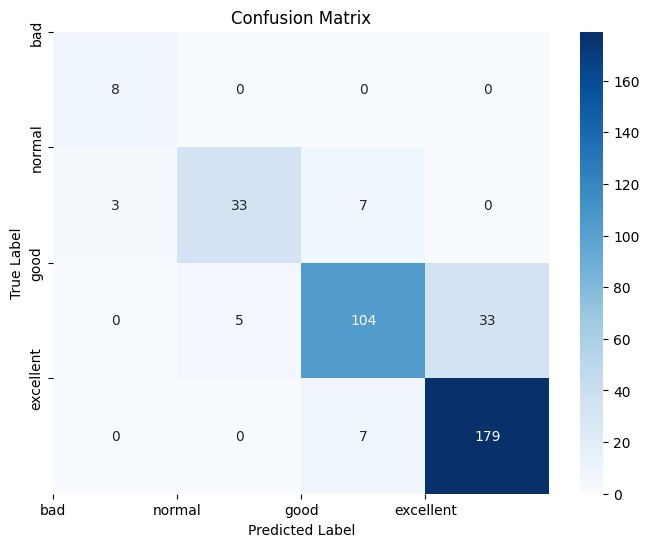

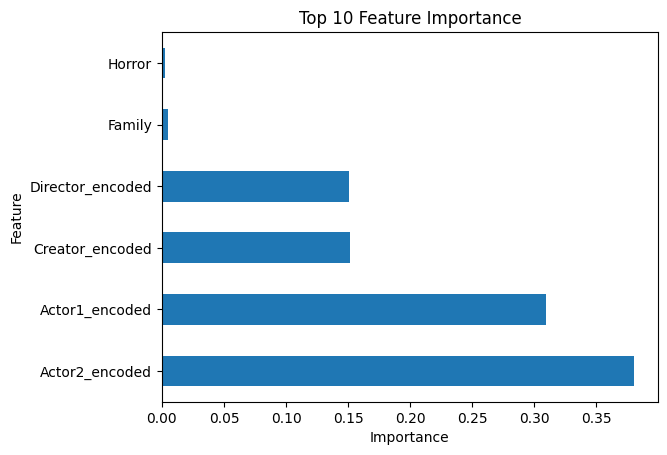

In [19]:
# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = rf.predict(X_train2)
y_test_pred = rf.predict(X_test)

# Tính accuracy trên tập huấn luyện và tập kiểm tra
train_accuracy = accuracy_score(y_train2, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.xticks(ticks=[0, 1, 2, 3], labels=['bad', 'normal', 'good', 'excellent'])
plt.yticks(ticks=[0, 1, 2, 3], labels=['bad', 'normal', 'good', 'excellent'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# In feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X_train2.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Gradient Boosting

In [20]:
param_grid = {
    'n_estimators': [10,20,30,40,50,60,70,80,90,100],  # Số lượng cây trong rừng
    'learning_rate': [0.01, 0.1, 0.005, 0.2],  # Tốc độ học
    'max_depth': [3, 4, 5, 6, 7, 8],  # Độ sâu tối đa của mỗi cây
    'min_samples_split': [2, 5, 10],  # Số lượng mẫu tối thiểu để chia một nút
    'min_samples_leaf': [1, 2, 4],  # Số lượng mẫu tối thiểu ở mỗi lá
    'subsample': [0.6, 0.8, 1.0]  # Tỷ lệ mẫu để chọn ngẫu nhiên cho mỗi cây
}

GD0 = GradientBoostingClassifier()

GD_random = RandomizedSearchCV(
    estimator=GD0, 
    param_distributions=param_grid, 
    n_iter=100, 
    cv=5, 
    verbose=2, 
    random_state=42, 
    n_jobs=-1
)


GD_random.fit(X_train2, y_train2)
print("Best parameters : ",GD_random.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters :  {'subsample': 0.8, 'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 4, 'learning_rate': 0.1}


In [23]:
GD = GD_random.best_estimator_

# Đánh giá độ chính xác trên tập huấn luyện
GD_score_train = GD.score(X_train2, y_train2)
print(f'Gradient Boosting accuracy on training set:', GD_score_train * 100)

# Đánh giá độ chính xác trên tập validation
GD_score_val = GD.score(X_val, y_val)
print(f'Gradient Boosting accuracy on validation set:', GD_score_val * 100)


# Đánh giá độ chính xác trên tập kiểm thử
GD_score_test = GD.score(X_test, y_test)
print(f'Gradient Boosting accuracy on test set:', GD_score_test * 100)

Gradient Boosting accuracy on training set: 91.36453526697429
Gradient Boosting accuracy on validation set: 88.68421052631578
Gradient Boosting accuracy on test set: 86.54353562005277


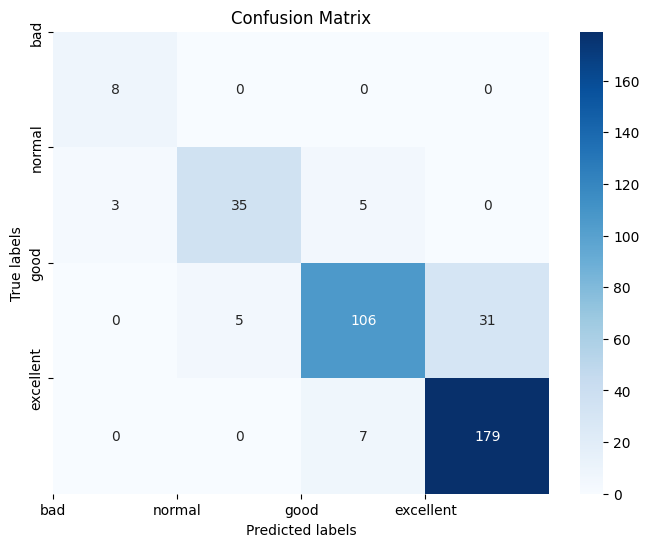

In [24]:
y_pred_GD = GD.predict(X_test)

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_GD)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xticks(ticks=[0, 1, 2, 3], labels=['bad', 'normal', 'good', 'excellent'])
plt.yticks(ticks=[0, 1, 2, 3], labels=['bad', 'normal', 'good', 'excellent'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# KNN

In [30]:
param_dist = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'weights': ['uniform', 'distance']
}

KNN_random = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist, n_iter=100, cv=5, verbose=2, n_jobs=-1)

# Huấn luyện mô hình với dữ liệu đào tạo
KNN_random.fit(X_train2, y_train2)

# Lấy kết quả tốt nhất từ tìm kiếm ngẫu nhiên
print("Best parameters : ",KNN_random.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters :  {'weights': 'distance', 'n_neighbors': 9}


In [31]:
KNN = KNN_random.best_estimator_



# Đánh giá độ chính xác trên tập huấn luyện
knn_score_train = KNN.score(X_train2, y_train2)
print(f'KNN accuracy on training set:', knn_score_train * 100)

# Đánh giá độ chính xác trên tập validation
knn_score_val = KNN.score(X_val, y_val)
print(f'KNN accuracy on validation set:', knn_score_val * 100)

# Đánh giá độ chính xác trên tập kiểm thử
knn_score_test = KNN.score(X_test, y_test)
print(f'KNN accuracy on test set:', knn_score_test * 100)

KNN accuracy on training set: 92.089650626236
KNN accuracy on validation set: 86.57894736842105
KNN accuracy on test set: 86.01583113456465


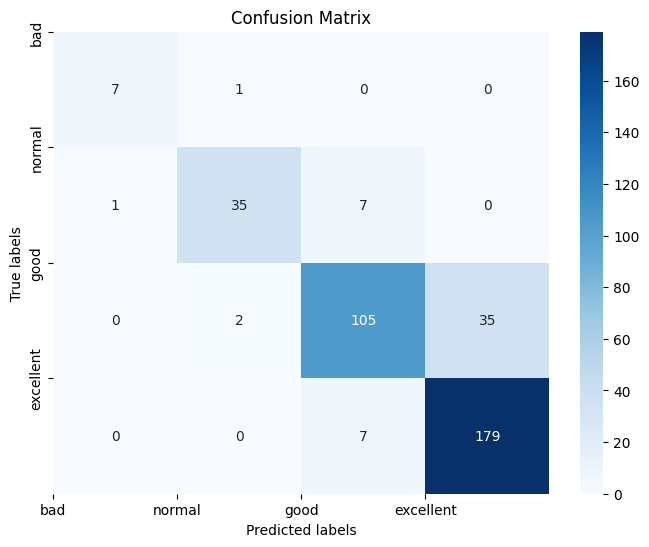

In [32]:
# Dự đoán nhãn cho tập kiểm tra
y_pred = KNN.predict(X_test)

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xticks(ticks=[0, 1, 2, 3], labels=['bad', 'normal', 'good', 'excellent'])
plt.yticks(ticks=[0, 1, 2, 3], labels=['bad', 'normal', 'good', 'excellent'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



[0.855, 0.865, 0.86]


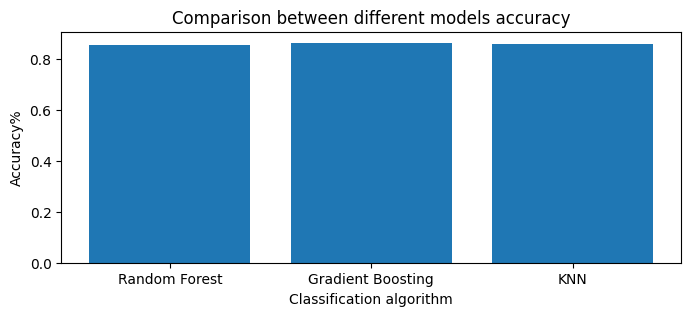

In [34]:
import matplotlib.pyplot as plt

accuracy = ['Random Forest',"Gradient Boosting" , "KNN"]
values = [round(RF_test_score,3),round(GD_score_test,3),round(knn_score_test,3)]
print(values)
plt.figure(figsize=(8,3))
plt.bar(accuracy, values)
# Displaying the bar plot
plt.xlabel('Classification algorithm')
plt.ylabel('Accuracy%')
plt.title('Comparison between different models accuracy')
plt.show()


Nhận xét: 

1. Gradient Boosting đạt độ chính xác cao nhất (86.5%), cho thấy mô hình này hoạt động tốt nhất trong ba mô hình được thử nghiệm. Gradient Boosting thường hiệu quả trong việc xử lý các tập dữ liệu phức tạp và có khả năng cao trong việc giảm thiểu lỗi do tính năng kết hợp của nhiều cây quyết định.

2. KNN và Random Forest có độ chính xác khá gần nhau (85.5% và 86.0%). Điều này cho thấy cả hai mô hình này cũng hoạt động tốt, mặc dù không tốt bằng Gradient Boosting. KNN đơn giản hơn và có thể hoạt động tốt trên các tập dữ liệu nhỏ hơn hoặc có cấu trúc rõ ràng, trong khi Random Forest có khả năng xử lý tốt các biến ngẫu nhiên và giảm thiểu hiện tượng quá khớp (overfitting).

3. Sự chênh lệch nhỏ giữa các mô hình: Sự khác biệt về độ chính xác giữa ba mô hình là không quá lớn. Điều này có thể cho thấy rằng các mô hình đều đủ tốt để sử dụng và không có mô hình nào có ưu thế vượt trội rõ ràng trong trường hợp cụ thể của bài toán.

Dựa trên kết quả này, nhóm em chọn Gradient Boosting làm mô hình chính, nhưng vẫn có thể cân nhắc sử dụng KNN và Random Forest trong các tình huống cụ thể hoặc kết hợp chúng để tạo ra một mô hình ensemble nếu cần thiết.

Tổng kết:
Gradient Boosting là mô hình tốt nhất trong ba mô hình, với độ chính xác cao nhất. 
Tuy nhiên, KNN và Random Forest cũng đạt kết quả rất cao, cho thấy chúng đều là những mô hình mạnh mẽ và đáng tin cậy. Sự chênh lệch nhỏ giữa các mô hình cho thấy tất cả đều đủ tốt để sử dụng. 
=> Chọn Gradient Boosting làm mô hình chính